In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import feature_selection

In [160]:
df = pd.read_csv('train.csv')

In [161]:
df.shape

(4357336, 26)

## Feature Engineering

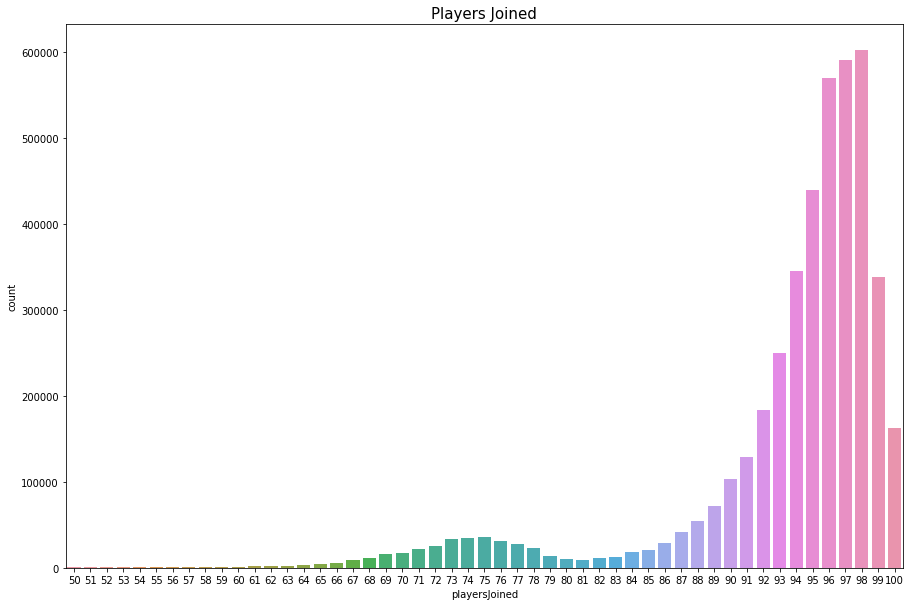

In [62]:
# PlayersJoin
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')
data = df.copy()
data = data[data['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

In [64]:
# remove cheating player
# Kills without movement
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['killsWithoutMoving'] = ((df['kills'] > 0) & (df['totalDistance'] == 0))

# 100% headshot players
df['headshot_rate'] = df['headshotKills'] / df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

display(df[df['killsWithoutMoving'] == True].shape)
df[df['killsWithoutMoving'] == True].head()

(1431, 30)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving,headshot_rate
1777,1777,344864,1777,6,0,1087.0,13,6,0,1,...,0,0,0.0,9,1500,1.0000,13,0.0,True,0.500000
3260,3260,993275,3260,0,0,510.9,0,1,0,6,...,0,0,0.0,10,1500,0.7692,18,0.0,True,0.166667
3405,3405,1057673,3405,3,1,1462.0,0,5,6,1,...,0,0,0.0,29,1500,1.0000,11,0.0,True,0.333333
3612,3612,1148248,3612,12,0,2322.0,19,5,0,2,...,0,0,0.0,33,1500,0.7500,19,0.0,True,0.277778
4371,4371,1483027,4371,4,0,582.2,5,2,0,34,...,0,0,0.0,16,1500,0.2000,45,0.0,True,0.400000


## Preprocessing

In [65]:
# Remove outliners that kill players without moving
df.drop(df[df['killsWithoutMoving'] == True].index, inplace=True)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


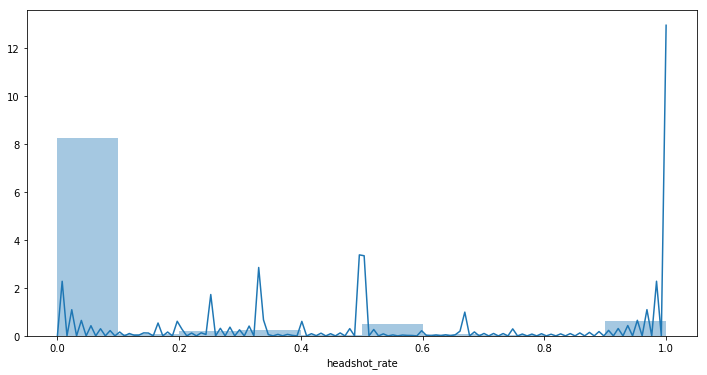

In [66]:
# visualize headshot rate
plt.figure(figsize=(12,6))
sns.distplot(df['headshot_rate'], bins=10)
plt.show()

In [67]:
# Players who made a minimum of 7 kills and have a headshot_rate of 100%
display(df[(df['headshot_rate'] == 1) & (df['kills'] > 7)].shape)

(28, 30)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


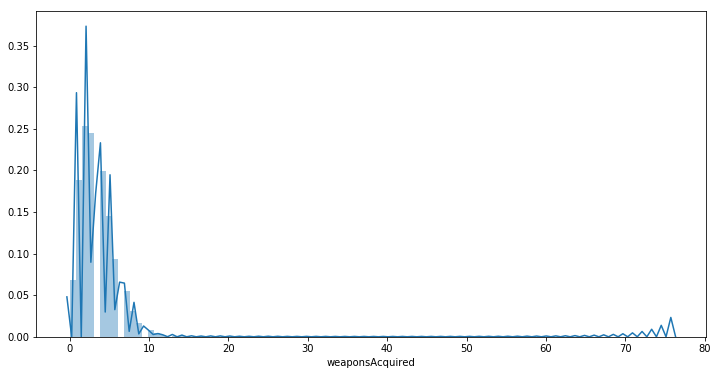

In [68]:
# Weapons acquired cheaters
plt.figure(figsize=(12,6))
sns.distplot(df['weaponsAcquired'], bins=100)
plt.show()

In [69]:
df[df['weaponsAcquired'] >= 60].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving,headshot_rate
7498,7498,2590560,7498,5,0,1470.0,0,2,11,7,...,0,0,1013.00,61,1500,0.3333,10,2981.00,False,0.166667
7790,7790,2603586,7790,8,0,2413.0,0,4,4,10,...,0,0,212.20,60,1500,0.5294,21,212.20,False,0.190476
198722,280551,2603584,7790,5,0,2475.0,0,6,10,8,...,0,0,24.57,60,1500,0.6471,21,24.57,False,0.272727
265024,367310,718928,26362,12,0,3363.0,0,8,2,8,...,0,0,1104.00,67,1500,0.6957,24,3126.00,False,0.307692
341913,485113,2603583,7790,4,0,2448.0,0,3,13,6,...,0,0,1311.00,63,1500,0.7059,21,3334.00,False,0.120000


In [70]:
# Remove outliers
df.drop(df[df['weaponsAcquired'] >= 60].index, inplace=True)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


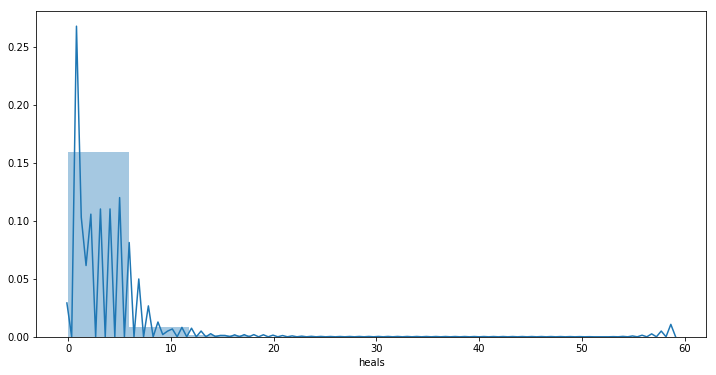

In [71]:
# Supply cheaters
plt.figure(figsize=(12,6))
sns.distplot(df['heals'], bins=10)
plt.show()

In [72]:
df[df['heals'] >= 50]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving,headshot_rate
271303,373589,994708,32641,0,1,0.0,0,0,55,44,...,0,0,3486.0,6,1530,0.9271,97,3486.0,False,0.0
721128,1027544,2266055,6147,1,1,136.5,0,0,58,15,...,0,0,2275.0,3,1499,0.8065,100,5476.0,False,0.0
1546110,2196694,804883,28286,0,5,0.0,0,0,59,16,...,0,0,782.7,0,1503,0.6923,34,3272.7,False,0.0


In [73]:
# Remove outliers
df.drop(df[df['heals'] >= 50].index, inplace=True)

In [74]:
df.shape

(4355887, 30)

In [75]:
y=df['winPlacePerc']

In [76]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [79]:
x = df.drop(['winPlacePerc'],axis=1)

In [80]:
x.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,playersJoined,totalDistance,killsWithoutMoving,headshot_rate
0,0,5,247.30,2,0,4,17,1050,2,1,...,0.0,0,0,782.40,4,1458,99,1373.70,False,0.0
1,1,0,37.65,1,1,0,45,1072,1,1,...,0.0,0,0,119.60,3,1511,93,119.60,False,1.0
2,0,1,93.73,1,0,2,54,1404,0,0,...,0.0,0,0,3248.00,5,1583,93,3248.00,False,0.0
3,0,0,95.88,0,0,0,86,1069,0,0,...,0.0,0,0,21.49,1,1489,97,21.49,False,0.0
4,0,1,0.00,0,0,1,58,1034,0,0,...,0.0,0,0,640.80,4,1475,93,640.80,False,0.0


## Feature Selection

In [95]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [82]:
from sklearn.linear_model import LinearRegression

In [93]:
from sklearn import feature_selection

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Feature selection
LR = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 101, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    cm_fs = fs.fit_transform(x, y)
    scores = abs(model_selection.cross_val_score(LR, cm_fs, y, cv=5, scoring='neg_mean_absolute_error'))
    print(i,scores.mean())
    results = np.append(results, scores.mean())

1 0.14243584720273017
6 0.12082565421758706
11 0.12035321870618106
16 0.12025276581328062
21 0.1148372948094489
26 0.11481988136070861
31 0.11172755808643589
36 0.11171994222121706
41 0.10425419935581925
46 0.10416476615137234
51 0.1038273622008418
56 0.10382363878254867
61 0.10289663545904046
66 0.10277423957263643
71 0.10277614906086403
76 0.1027462165225097
81 0.10030929830116471
86 0.09972186692034407
91 0.09972233984970455
96 0.09553846728429213


In [106]:
cm_feature = x.columns

In [107]:
optimal_percentile = int(np.where(results == results.min())[0])
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
optimal_num_features = int(percentiles[optimal_percentile]*len(cm_feature)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

Optimal percentile of features:96 

Optimal number of features:24 



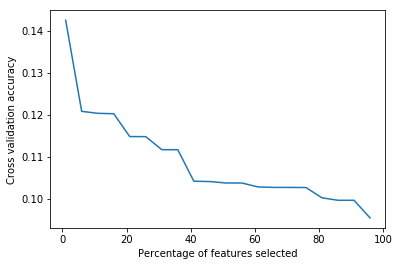

In [108]:
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles, results)

In [114]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=96)
x_fs = fs.fit_transform(x, y)
for i in range(len(cm_feature)):
    if fs.get_support()[i]:
        print(cm_feature[i],'\t', fs.scores_[i] )

assists 	 447548.0905460063
boosts 	 2694564.1149771535
damageDealt 	 1042134.8735401452
DBNOs 	 370996.0351932628
headshotKills 	 367749.2093076857
heals 	 978194.5510467266
killPlace 	 4390470.158637346
killPoints 	 35897.736260089405
kills 	 912369.7029686667
killStreaks 	 702622.951364569
longestKill 	 859582.8653217416
maxPlace 	 5169.353863920542
numGroups 	 5664.052400352653
revives 	 294275.19879053364
rideDistance 	 434864.9543019018
roadKills 	 3637.1248528921487
swimDistance 	 107112.34510937342
vehicleDestroys 	 14555.932237384477
walkDistance 	 8438778.614720358
weaponsAcquired 	 2155433.6556205563
winPoints 	 130300.47874680879
playersJoined 	 428.7147734263903
totalDistance 	 3651129.046176664
headshot_rate 	 139303.97659549944


In [122]:
from sklearn import preprocessing

In [123]:
min_max_scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0,1)).fit(x_fs)
data_norm = min_max_scaler.transform(x_fs)
data_norm[0]

array([0.        , 0.27777778, 0.03873747, 0.03174603, 0.        ,
       0.08333333, 0.16161616, 0.4730444 , 0.03333333, 0.07142857,
       0.04937264, 0.29      , 0.27272727, 0.02439024, 0.01221947,
       0.        , 0.        , 0.        , 0.04522543, 0.06779661,
       0.70438652, 0.98989899, 0.02773415, 0.        ])

In [124]:
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(data_norm, y, test_size=0.33, random_state=478)

In [125]:
LR = LinearRegression()
LR.fit(x_train_fs, y_train_fs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
from sklearn import metrics

## Feature Selection with Linear Regression Result

In [126]:
y_pred_fs = LR.predict(x_test_fs)

In [129]:
# MAE
print(metrics.mean_absolute_error(y_test_fs, y_pred_fs))
# MSE
print(metrics.mean_squared_error(y_test_fs, y_pred_fs))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_fs, y_pred_fs)))

0.0954197454158444
0.017043369585895154
0.13055025693538544


In [127]:
print ('Regression Coefficients: \n', LR.coef_)

Regression Coefficients: 
 [ 4.39137372e-01  2.62127670e-01  2.72119704e-01 -3.22183451e-01
  1.29855826e+00  4.47550470e-02 -8.12311959e-01 -1.56748227e-01
 -1.39402168e+00 -1.96499925e+00 -2.66333669e-02 -6.53134279e-01
  7.49796533e-01  5.46467617e-01  2.44628361e+09  4.91194247e-01
  2.67225774e+08 -5.59945509e-02  8.74575461e+08  7.09679520e-01
  4.12866626e-01  4.04837066e-01 -2.50396515e+09 -1.23024019e-01]


## Feature Selection with Random Forest Regression Result

In [164]:
RFR = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
RFR.fit(x_train_fs, y_train_fs)
y_pred = RFR.predict(x_test_fs)

In [165]:
# MAE
print(metrics.mean_absolute_error(y_test_fs,y_pred))
# MSE
print(metrics.mean_squared_error(y_test_fs,y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred)))

0.062023525627092874
0.007662986642875405
0.08753848663802342


# PCA

In [5]:
from sklearn import decomposition

In [133]:
# PCA
pca = decomposition.PCA(n_components=5)
data_trans = pca.fit(data_norm).transform(data_norm)
print(data_trans)

[[ 2.42840686e-01 -1.22430556e-01 -2.85046494e-01 -1.19580348e-01
   1.68525266e-02]
 [ 5.99608239e-01 -6.29116823e-04  7.05091335e-01  4.05081622e-02
  -3.22881041e-02]
 [-3.70208805e-02 -2.17312463e-01 -4.86112184e-02 -1.09217690e-01
   1.57078954e-02]
 ...
 [ 4.40581651e-01 -2.87761749e-02 -1.30981650e-01 -3.54165640e-02
  -8.22929078e-02]
 [-3.31711677e-01 -2.87340700e-01  2.04833813e-01 -6.89767785e-02
  -3.02277288e-02]
 [ 7.62917246e-01  8.86471066e-02  5.49308750e-01 -7.41666337e-02
  -1.99278659e-02]]


In [134]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.38464177 0.35132969 0.16463189 0.02814766 0.02169643]
0.9504474384399568


In [135]:
# pca = decomposition.PCA(n_components=6)
# data_trans = pca.fit(data_norm).transform(data_norm)

# print(pca.explained_variance_ratio_)
# print(sum(pca.explained_variance_ratio_))

In [136]:
min_max_scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0,1)).fit(data_trans)
data_norm = min_max_scaler.transform(data_trans)
data_norm[0]

array([0.53111905, 0.30921983, 0.17106883, 0.33031399, 0.32690785])

In [137]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(data_norm, y, test_size=0.33, random_state=478)

In [138]:
LR = LinearRegression()
LR.fit(x_train_pca, y_train_pca)
y_pred_pca = LR.predict(x_test_pca)
print ('Regression Coefficients: \n', LR.coef_)

Regression Coefficients: 
 [ 0.94068651  0.37158327 -0.96102602 -1.28123452  0.97086164]


In [162]:
RFR = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
RFR.fit(x_train_pca, y_train_pca)
y_pred = RFR.predict(x_test_pca)

## PCA with Linear Regression Results

In [139]:
# MAE
print(metrics.mean_absolute_error(y_test_pca, y_pred_pca))
# MSE
print(metrics.mean_squared_error(y_test_pca, y_pred_pca))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_pca)))

0.13846883110213018
0.030350044844998418
0.17421264260953742


## PCA with Random Forest Regression Results

In [163]:
# MAE
print(metrics.mean_absolute_error(y_test, y_pred))
# MSE
print(metrics.mean_squared_error(y_test, y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.07361777782719925
0.011843012137901322
0.10882560423862264


## Raw Data Results

In [144]:
x.shape

(4355887, 26)

In [145]:
min_max_scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0,1)).fit(x)
data_norm = min_max_scaler.transform(x)
data_norm[0]

array([0.        , 0.27777778, 0.03873747, 0.03174603, 0.        ,
       0.08333333, 0.16161616, 0.4730444 , 0.03333333, 0.07142857,
       0.04937264, 0.29      , 0.27272727, 0.02439024, 0.01221947,
       0.        , 0.        , 0.        , 0.        , 0.04522543,
       0.06779661, 0.70438652, 0.98989899, 0.02773415, 0.        ,
       0.        ])

In [146]:
x_train, x_test, y_train, y_test = train_test_split(data_norm, y, test_size=0.33, random_state=478)

In [147]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print ('Regression Coefficients: \n', LR.coef_)

Regression Coefficients: 
 [ 4.34706297e-01  2.60488709e-01  2.98702770e-01 -2.95702638e-01
  1.30083814e+00  4.44617929e-02 -8.13230813e-01 -1.57414568e-01
 -1.43091841e+00 -1.96439414e+00 -2.92692964e-02 -6.49793418e-01
  7.46315102e-01  5.50278585e-01  1.83128255e+09  5.00307888e-01
  2.00044629e+08 -2.12467228e-01 -1.63667499e-02  6.54705273e+08
  7.11246350e-01  4.12848618e-01  4.05923004e-01 -1.87446282e+09
  0.00000000e+00 -1.23234589e-01]


## Raw Data with Linear Regression Results

In [148]:
# MAE
print(metrics.mean_absolute_error(y_test, y_pred))
# MSE
print(metrics.mean_squared_error(y_test, y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.09535405833092096
0.017019054246589158
0.1304570973408084


In [149]:
from sklearn.ensemble import RandomForestRegressor

## Raw Data with Random Forest Regression Results

In [166]:
RFR = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
RFR.fit(x_train, y_train)
y_pred = RFR.predict(x_test)

In [153]:
# MAE
print(metrics.mean_absolute_error(y_test, y_pred))
# MSE
print(metrics.mean_squared_error(y_test, y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0613385691214103
0.0074978618566127146
0.08659019492190045
